In [7]:
import pandas as pd
import talib
import matplotlib.pyplot as plt

In [8]:
# Define file paths relative to the notebook
file_paths = {
    'Apple': '../data/yfinance_data/AAPL_historical_data.csv',
    'Amazon': '../data/yfinance_data/AMZN_historical_data.csv',
    'Google': '../data/yfinance_data/GOOG_historical_data.csv',
    'Meta': '../data/yfinance_data/META_historical_data.csv',
    'Microsoft': '../data/yfinance_data/MSFT_historical_data.csv',
    'Tesla': '../data/yfinance_data/TSLA_historical_data.csv',
    'Nvidia': '../data/yfinance_data/NVDA_historical_data.csv'
}

### Merging the 7 csv files

In [10]:
def load_and_merge_data(file_paths):
    """
    Load and merge CSV files into a single DataFrame.
    """
    data_frames = []
    for company, file_path in file_paths.items():
        df = pd.read_csv(file_path)
        df['Company'] = company  # Add a column for the company name
        data_frames.append(df)

    merged_df = pd.concat(data_frames, ignore_index=True)
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Date', 'Company']
    if not all(col in merged_df.columns for col in required_columns):
        raise ValueError('Data does not contain the required columns')

    merged_df['Date'] = pd.to_datetime(merged_df['Date'])
    merged_df.set_index('Date', inplace=True)
    merged_df.sort_index(inplace=True)
    
    return merged_df

In [11]:
def calculate_indicators(df):
    """
    Calculate technical indicators and add them to the DataFrame.
    """
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    return df

In [12]:
def plot_stock_data(df, company):
    """
    Plot stock data and technical indicators for a specific company.
    """
    company_df = df[df['Company'] == company]
    
    plt.figure(figsize=(14, 7))
    plt.plot(company_df['Close'], label='Close Price', color='blue')
    plt.plot(company_df['SMA_20'], label='SMA 20', color='red')
    plt.plot(company_df['SMA_50'], label='SMA 50', color='green')
    plt.title(f'{company} Stock Price and Moving Averages')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 7))
    plt.plot(company_df['RSI'], label='RSI', color='purple')
    plt.title(f'{company} Relative Strength Index (RSI)')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 7))
    plt.plot(company_df['MACD'], label='MACD', color='blue')
    plt.plot(company_df['MACD_signal'], label='MACD Signal', color='red')
    plt.bar(company_df.index, company_df['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
    plt.title(f'{company} MACD and MACD Signal')
    plt.legend()
    plt.show()

In [13]:
merged_df = load_and_merge_data(file_paths)


In [14]:
merged_df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,Apple
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,Apple
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,Apple
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,Apple
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,Apple


In [15]:
merged_df = calculate_indicators(merged_df)

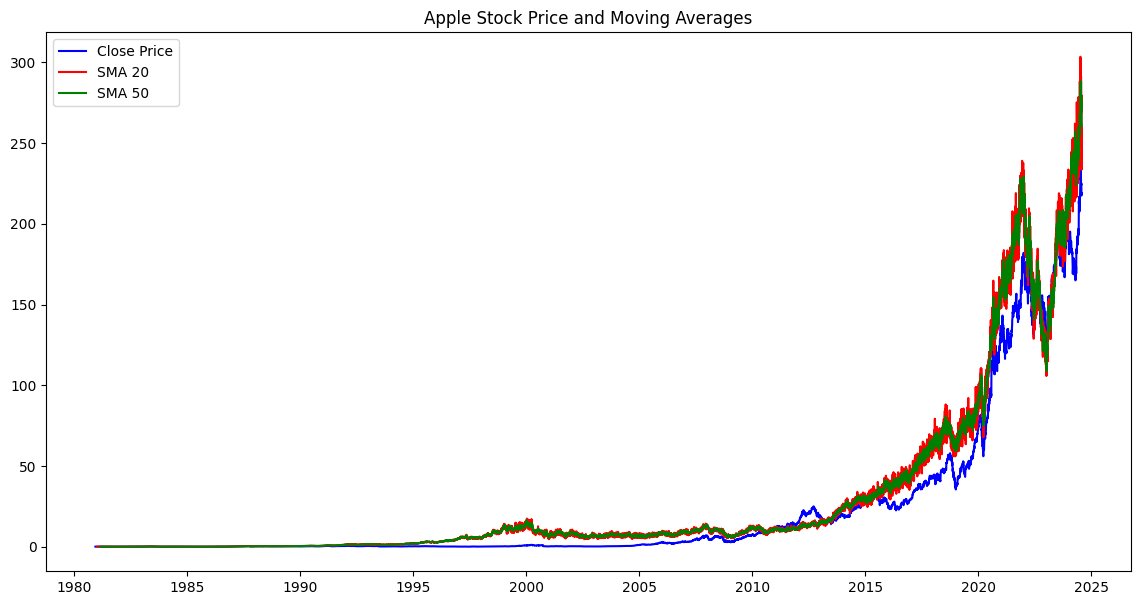

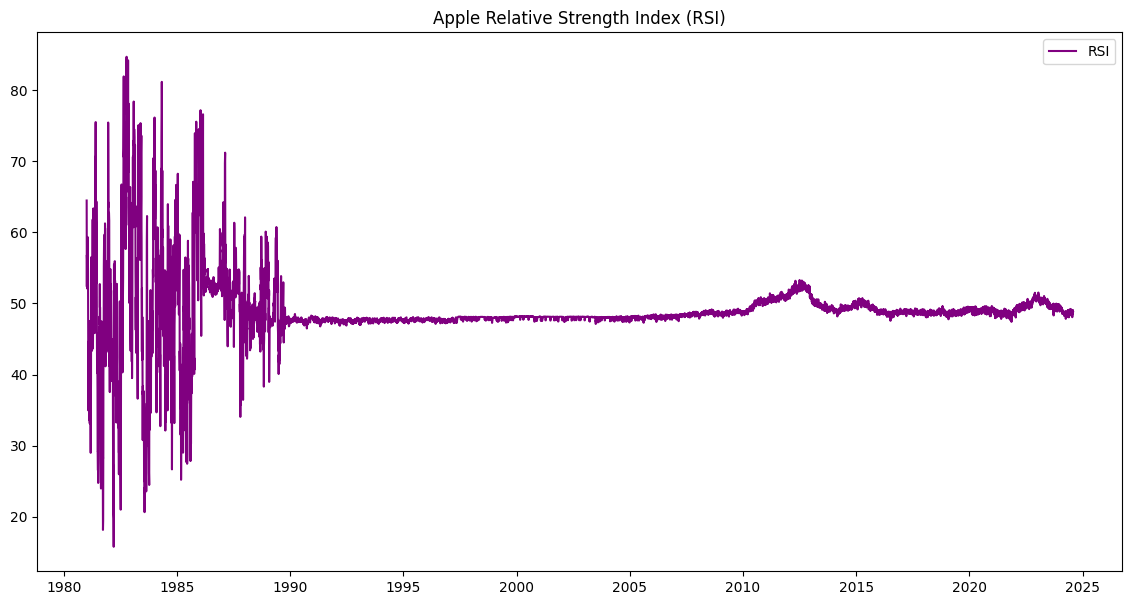

c:\Financial News Sentiment & Stock Market Analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


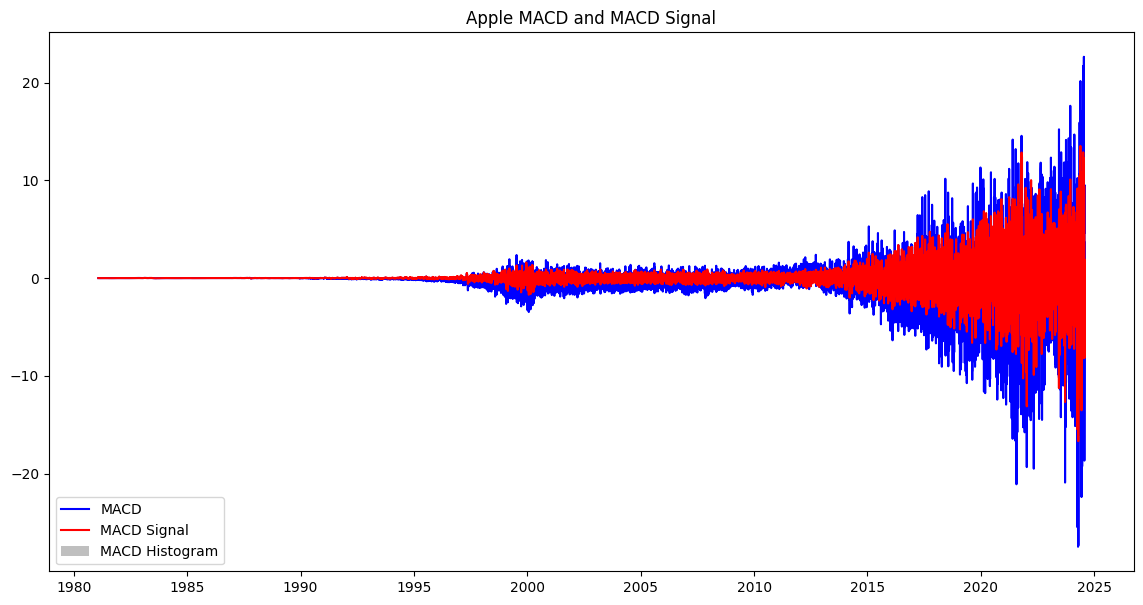

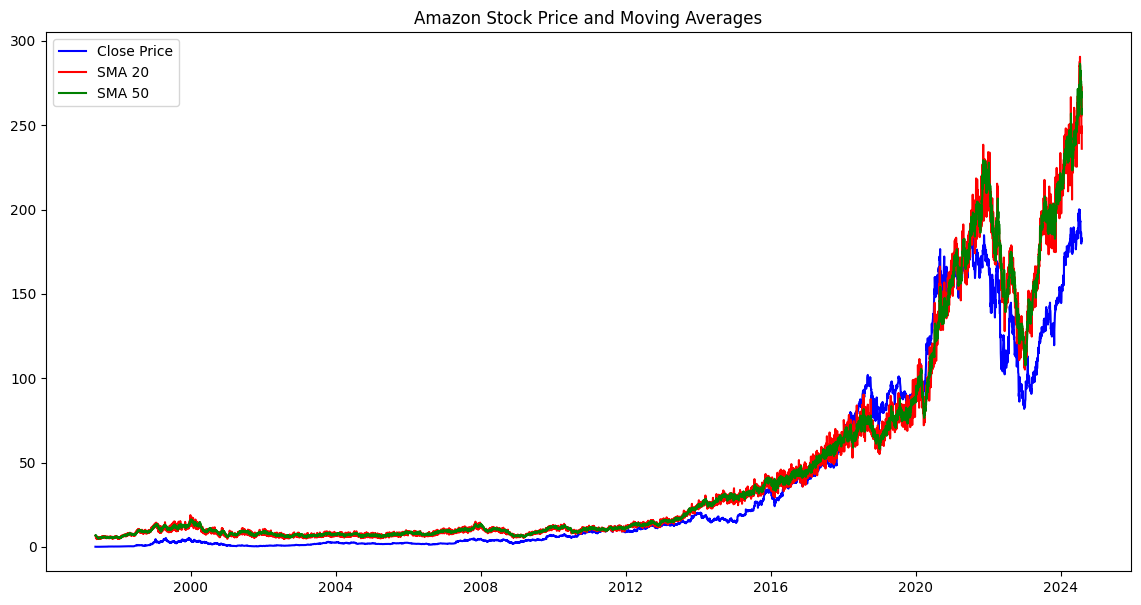

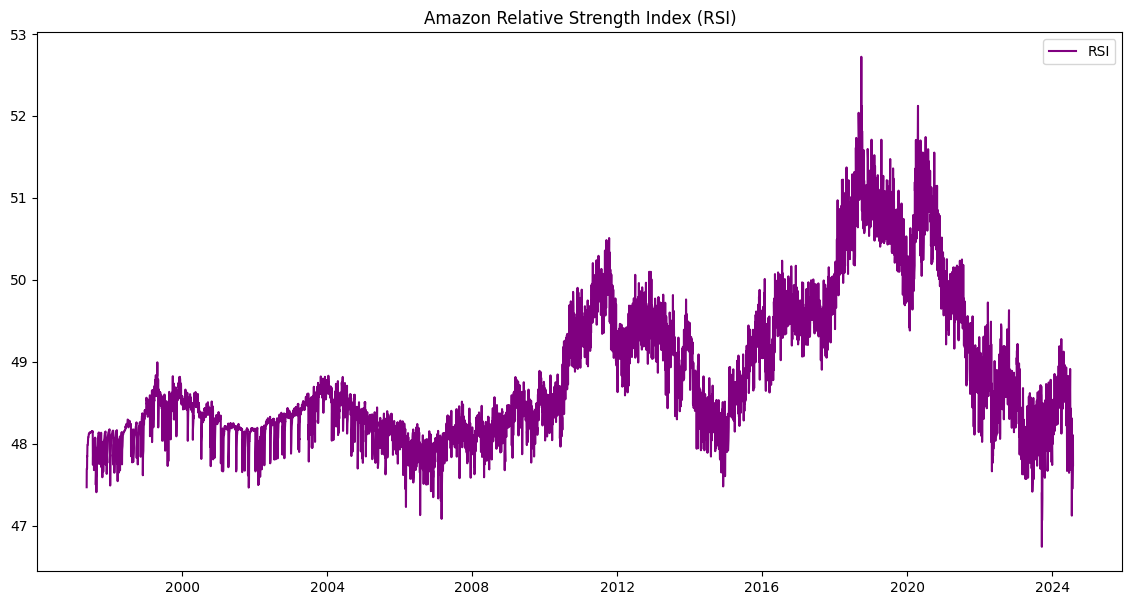

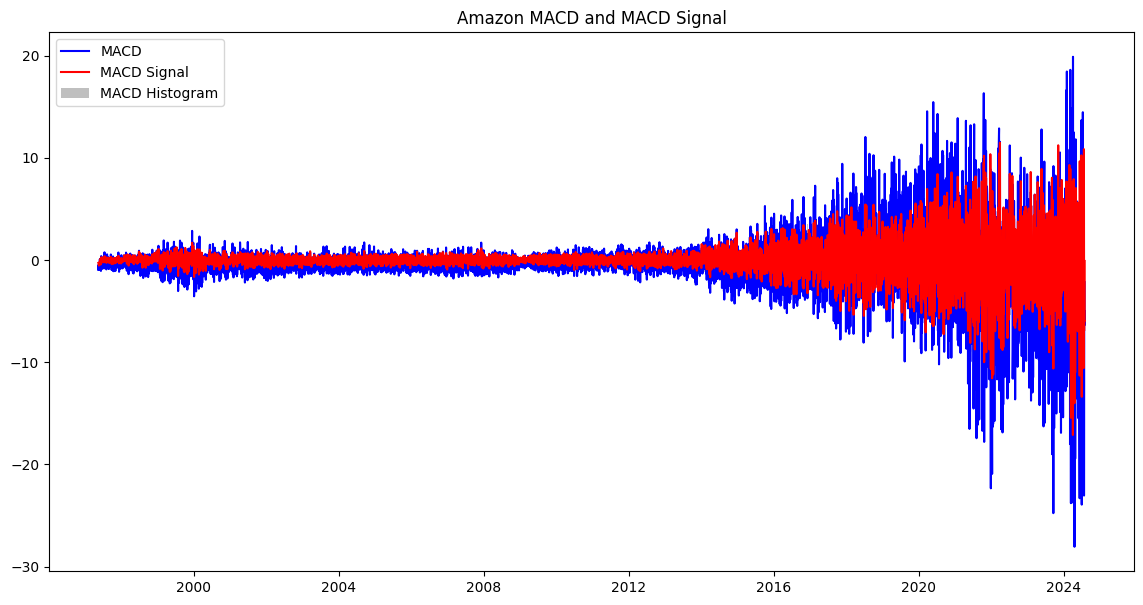

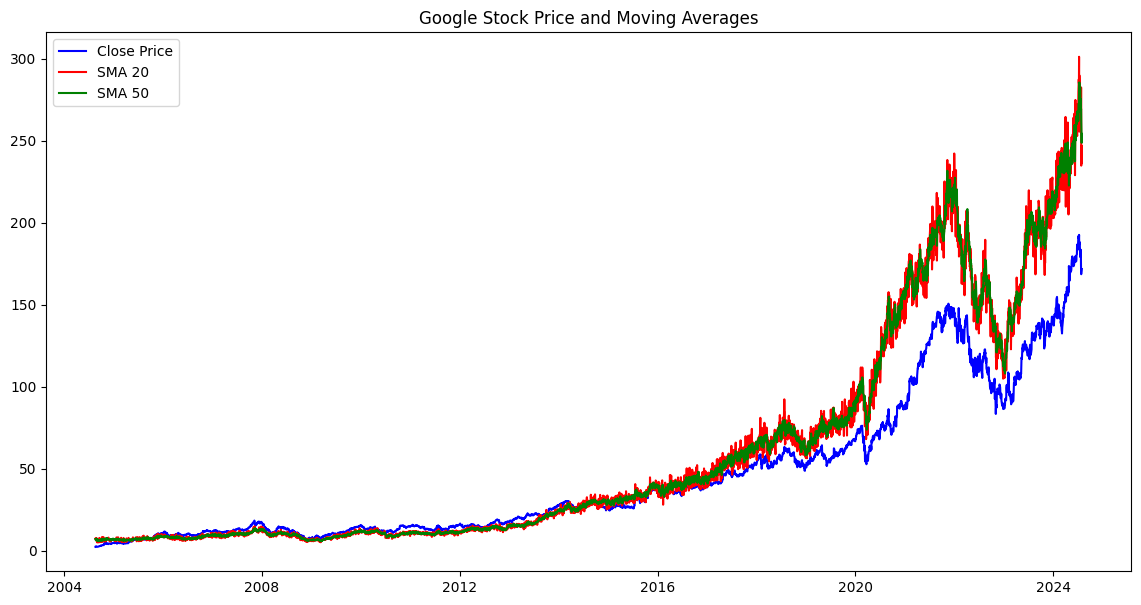

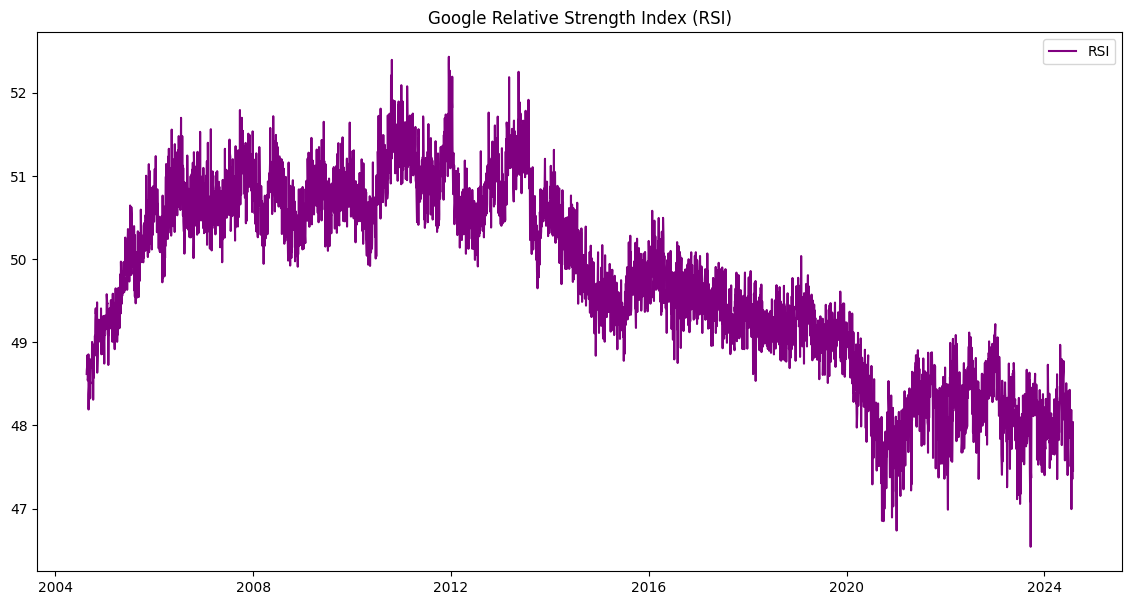

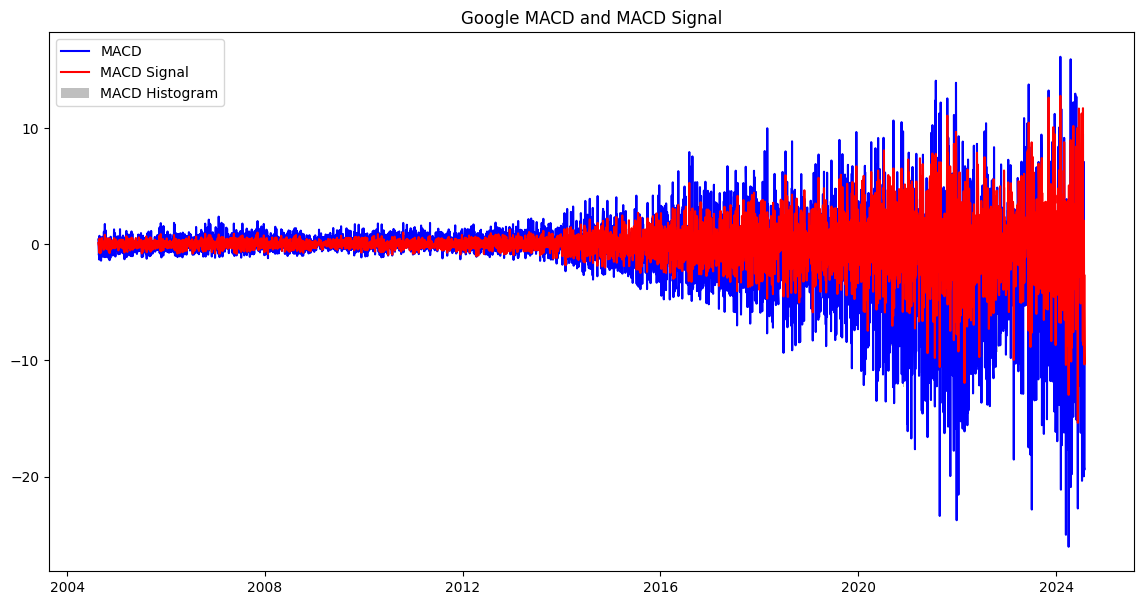

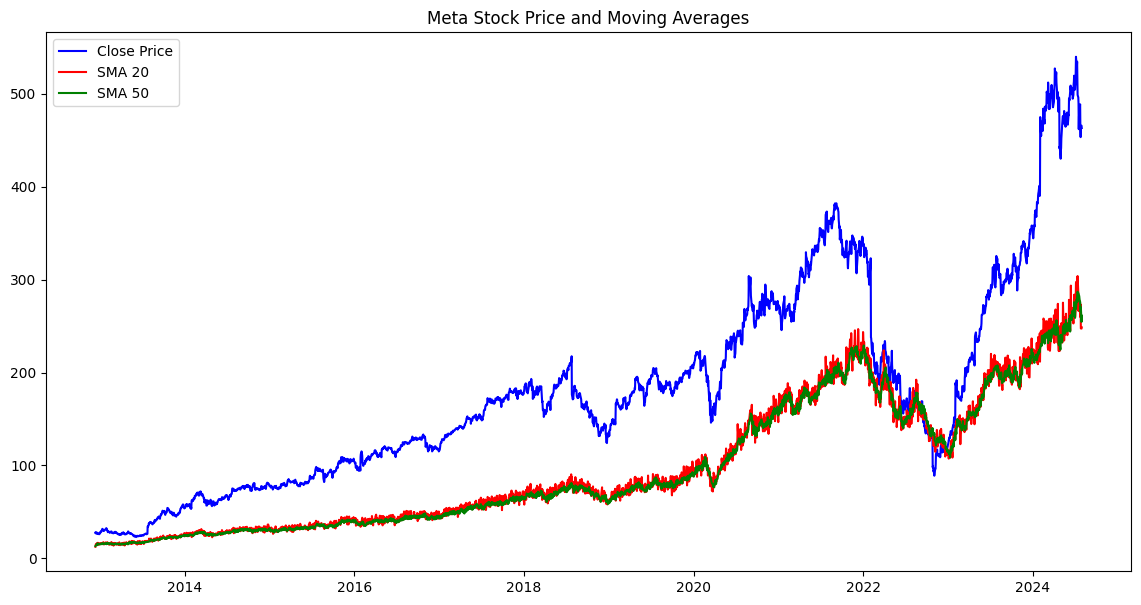

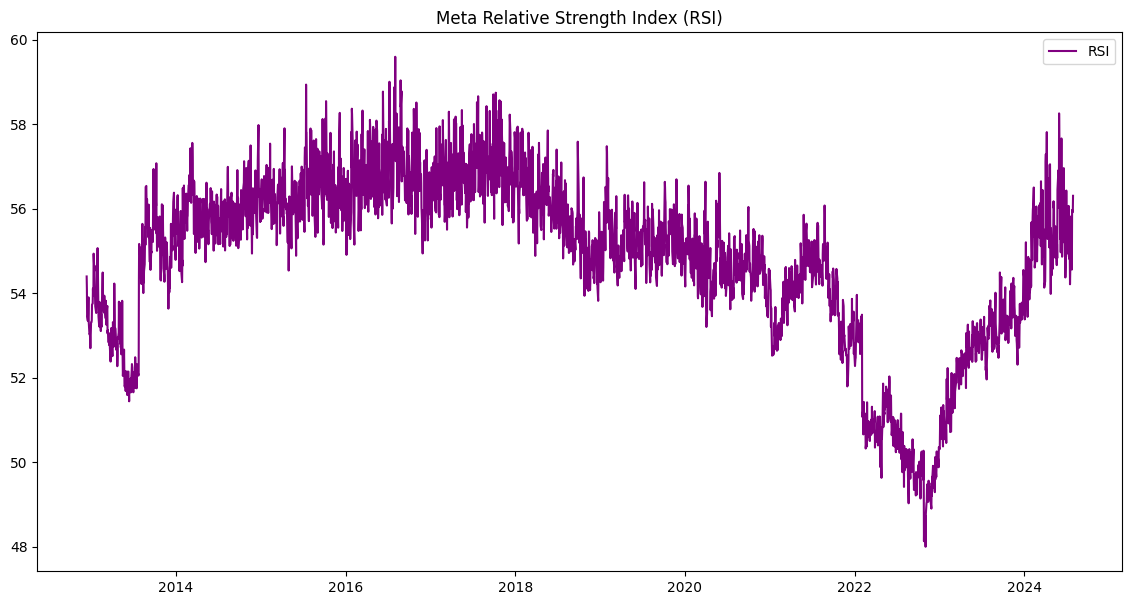

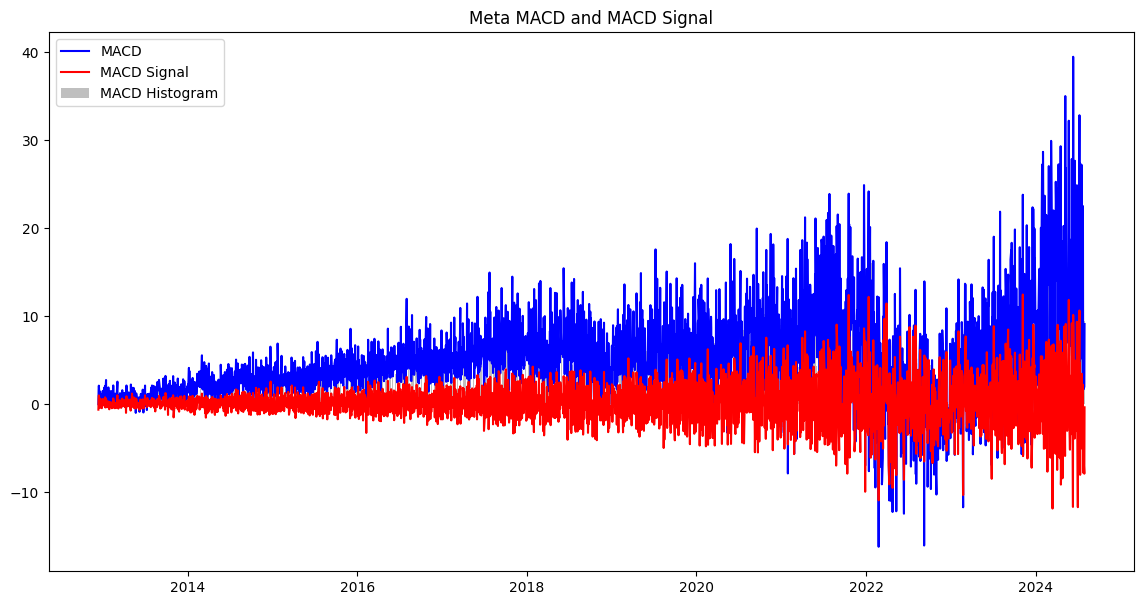

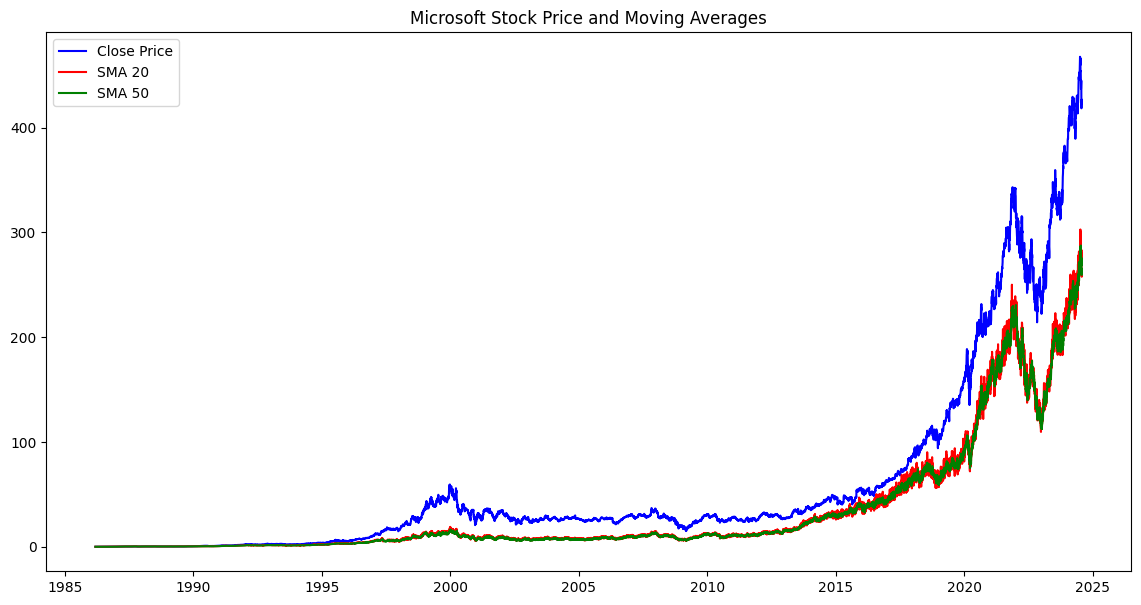

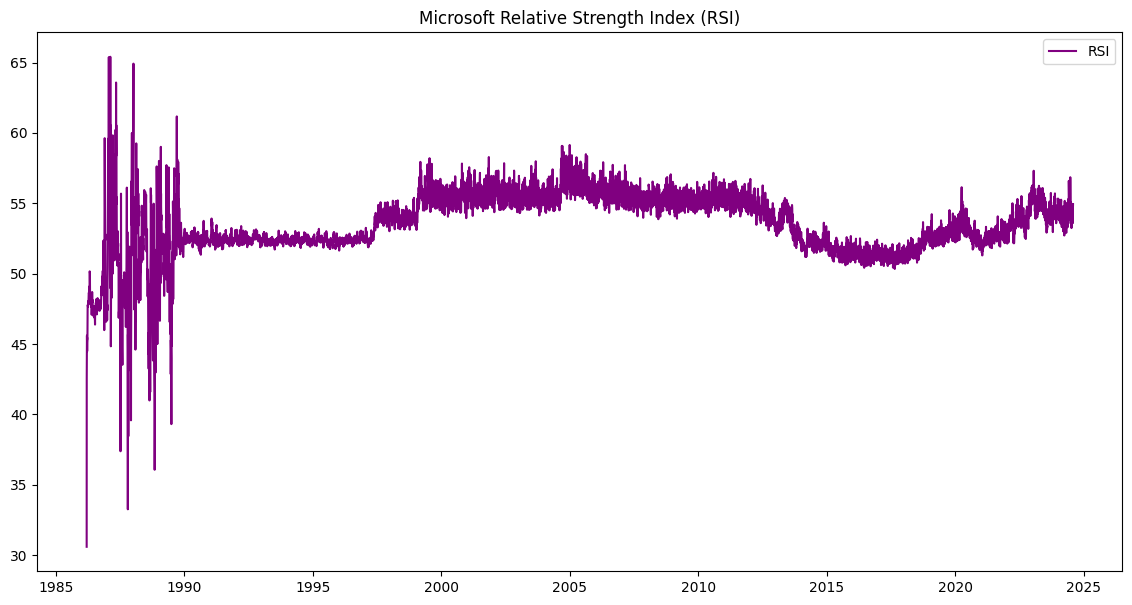

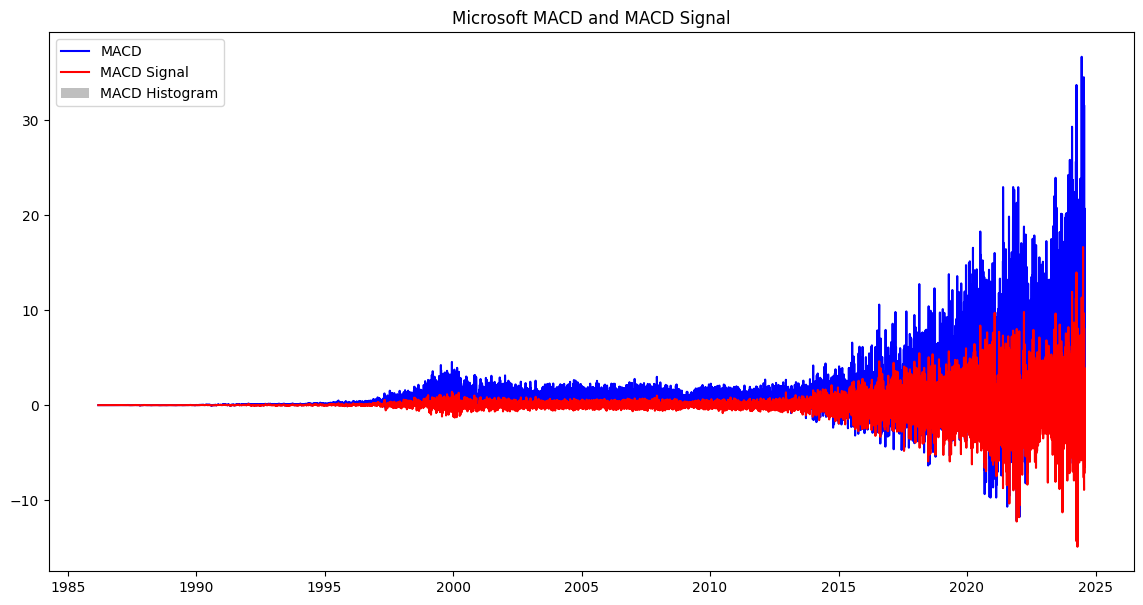

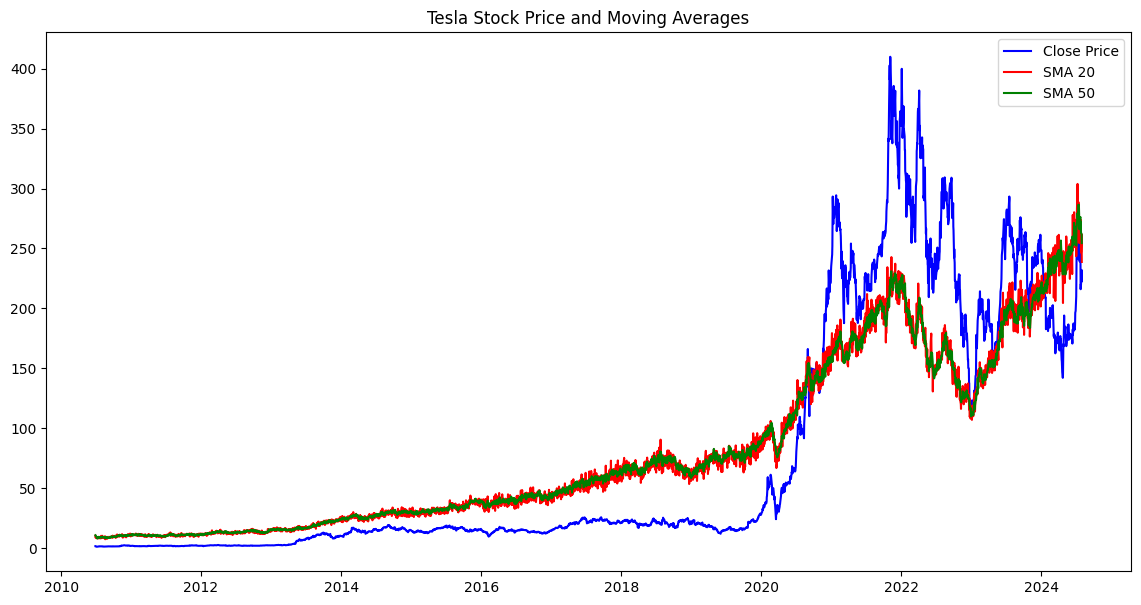

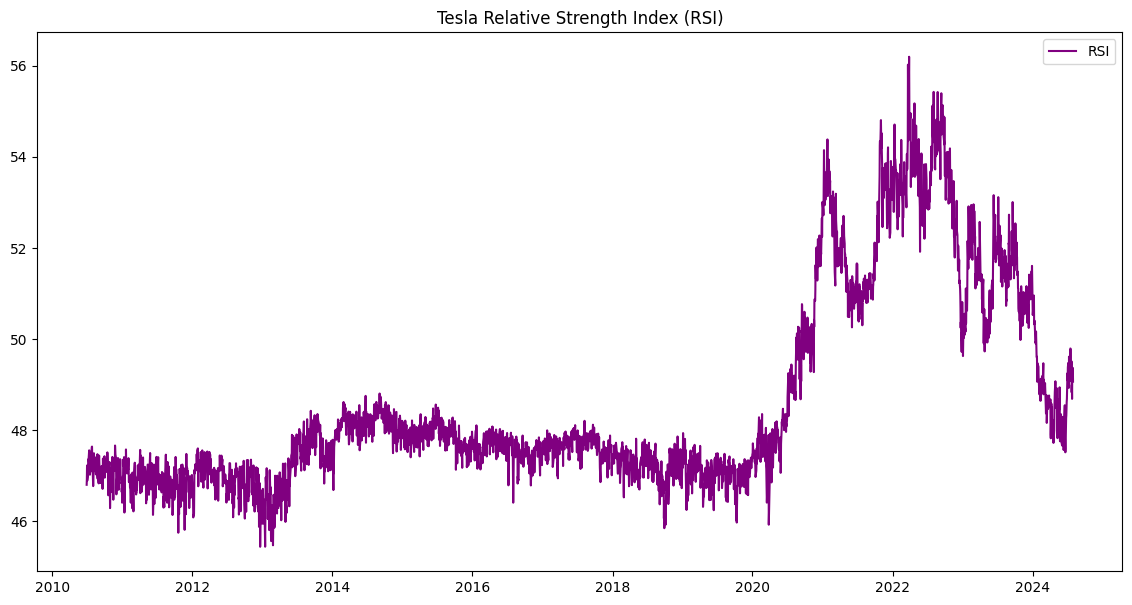

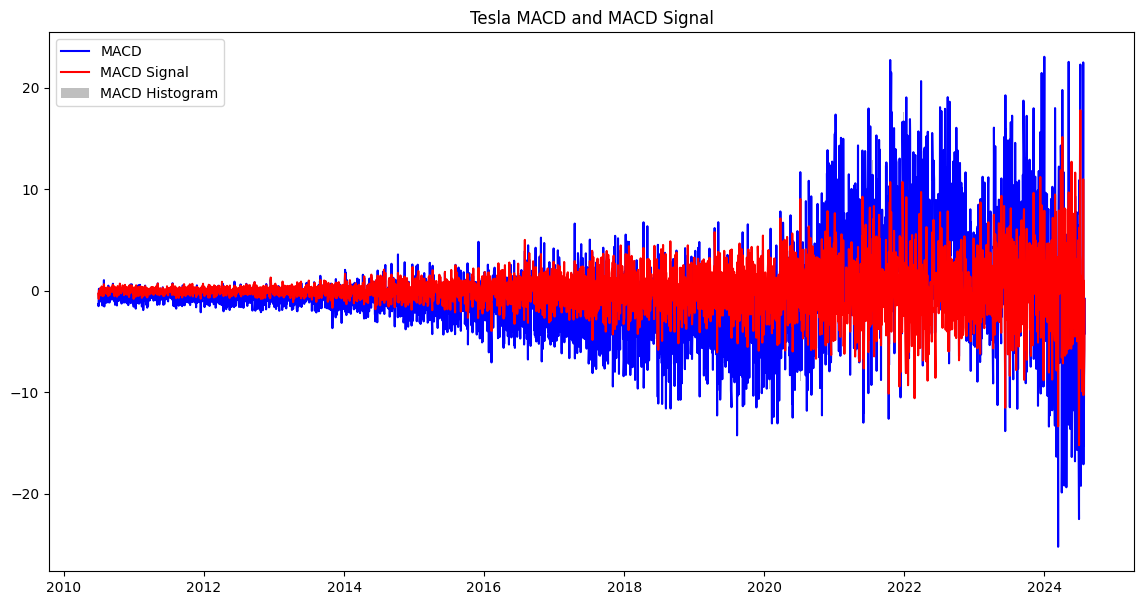

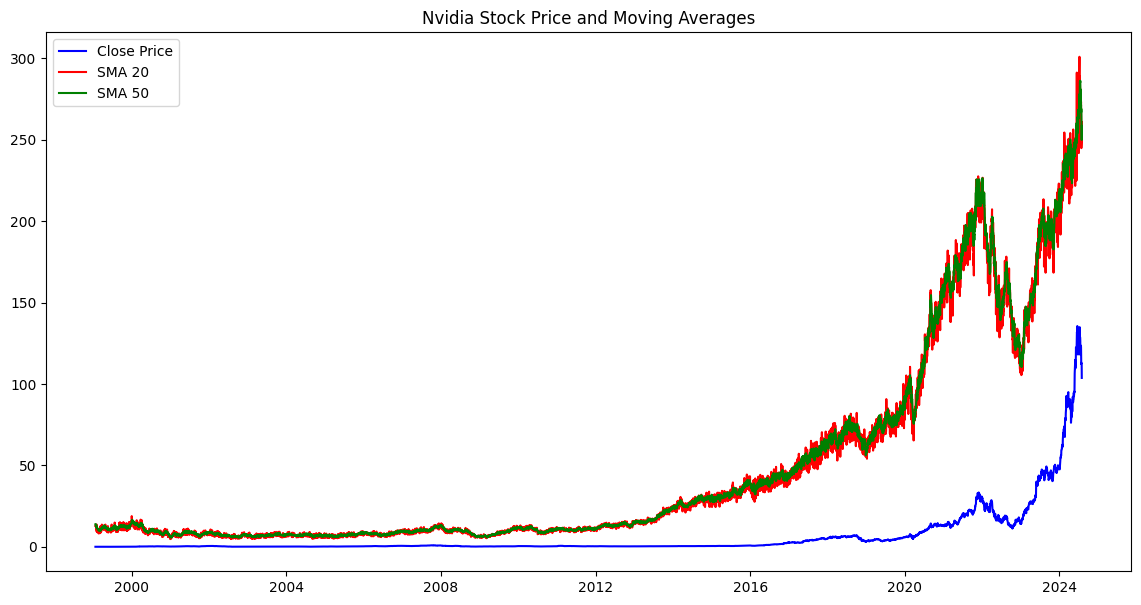

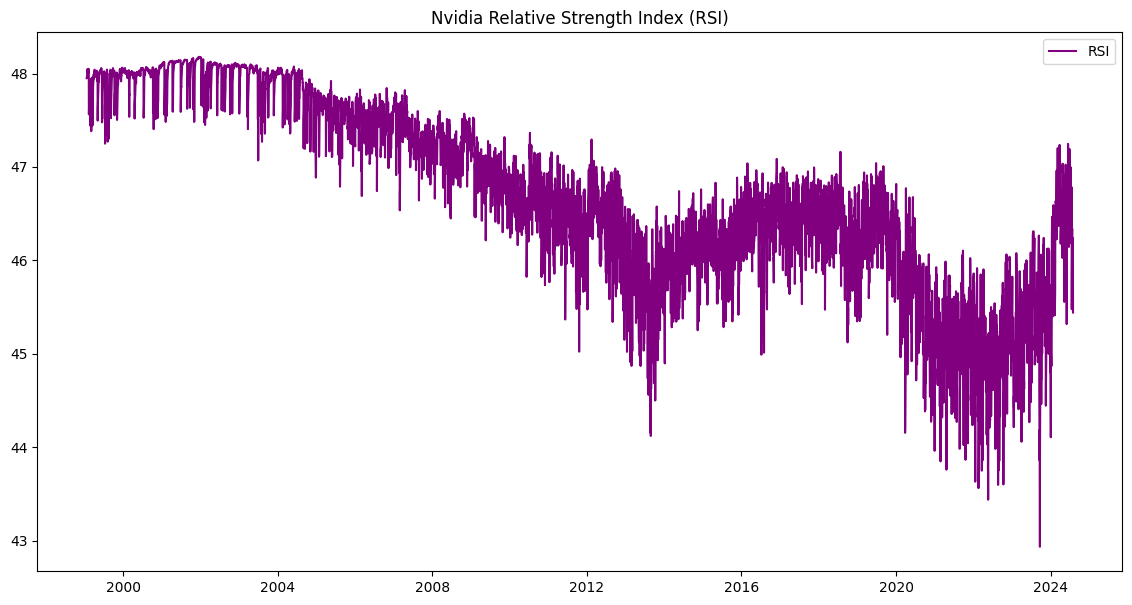

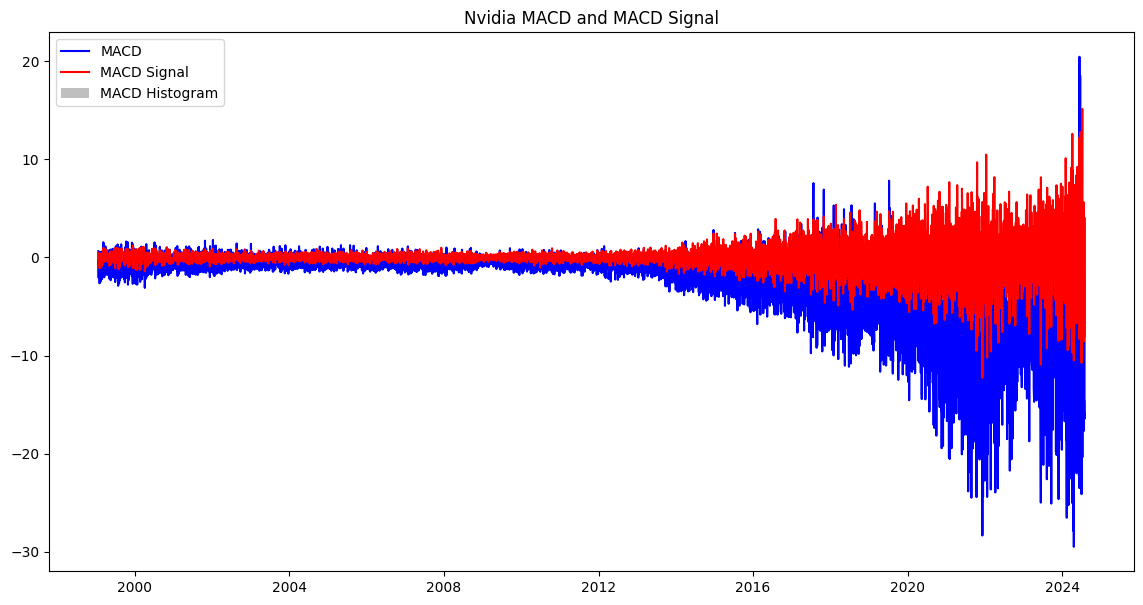

In [16]:
# Plot data for each company
for company in file_paths.keys():
    plot_stock_data(merged_df, company)